# Astronomy 8824 - Numerical and Statistical Methods in Astrophysics

## Introduction to Data Storage

These notes are for the course Astronomy 8824: Numerical and Statistical Methods in Astrophysics. 


In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import astropy
import sys, os

# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

### ASCII vs. Binary

*ASCII* (American Standard Code for Information Interchange) is a set of 128 7-bit characters that originated with telegraph data and was first published as a standard in 1963. As one byte is 8 bins, the ASCII encoding uses 7/8 of each byte. 

Common ways to read and write ASCII files in python are with file.open() and with np.savetxt(). 

The advantage of files stored in ASCII format (e.g. those with a .txt extension) is that they are human readable with a text editor. 

The disadvantage of ASCII files is that they do not store data very efficiently. For example, to store the number "3.1415926535" in ASCII requires 12 bytes, one per character. In contrast, this number can be stored as a single-precision floating point number, which requires only four bytes. 

*Binary* format stores information in terms of ones and zeros. It is commonly used for larger quantities of numerical data where total storage space is a factor, and where there is no requirement to have an immediately human-readable file. Binary files are typically organized in groups of eight bits, or bytes. There are standard numbers of bytes used to represent numbers width different amounts of precision. For example, 

- Single precision: This uses 32 bits or 4 bytes. Two bits for the base, one for the sign, 8 for the exponent, and 23+1 for the significand. 
- Double precision: This uses 64 bits or 8 bytes. Two bits for the base, one for the sign, 11 for the exponent, and 52+1 for the significand. 
- Signed integer: 32-bit data in the range -2147483648 to 2147483647
- Unsigned integer: 32 bin data in the range 0 to 4294967295

One common question that arises with data stored in binary format is whether the convention is *big-endian* or *little-endian.* The difference is that in little-endian format the least significant bytes  (littlest) are stored before the most significant bytes (biggest), and for big-endiant this is reversed. 

In [2]:
# Generate some data and save it in ASCII and binary format

x = np.linspace(1, 1000, 1000)
y = np.sin(x)

np.savetxt('file.txt', y, fmt='%e') 

np.save('file.bin', y)

# See the sizes of these two files with os.path.getsize(), which returns the size in bytes
os.path.getsize('file.txt'), os.path.getsize('file.bin.npy')

(13500, 8128)

The file size of the ASCII file is about 1000 * 12 bytes, as each number consists of about 12 ASCII characters. The filesize of the binary file is about 1000 * 8 bytes, as this is double precision. 

### FITS format

FITS stands for Flexible Image Transport System, a data storage format that was first standardized in 1981. FITS is the most common data format used in astronomy, and is a very effective way to store both image data (e.g. 1-D spectra, 2-D images, 3-D data cubes) and tables. 

The basic idea behind FITS is that there is a human-readable header in ASCII formation combined with data in binary format. Each fits file will contain one or more headers, and the headers (except perhaps the first) will each have an associated data block. 

The headers consist of a list of "cards" with a maximum length of 80 characters. Each of these cards consists of a keyword, a value for the keyword, and often a comment that describes the keyword. The 80 character length dates from when 80 characters was the maximum for an old punched card. Many of the keywords are standardized, such as to encode information about the coordinate system of an image (often called the World Coordinate System or WCS), the length of an exposure, date and time information about when data were obtained, etc. 

Details about the FITS standard are maintained at: https://fits.gsfc.nasa.gov/

There are numerous packages available that can read and write fits files in a variety of programming languages. Two modules in python are fitsio and astropy.io.fits. 

### astropy.io.fits

This example shows how to use fits.open() to open a test fits file that comes with astropy. The function fits.open() returns an HDUList object that lists all of the extensions in the fits file:

In [3]:
from astropy.io import fits
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open(fits_image_filename)
hdul.info()

Filename: /Users/martini.10/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


Note that hdul.info() prints five headers or "Header Data Units." This shows there is a primary header with 138 cards and four additional headers, each with 61 cards, and each with a 40x40 array of 16-bit integrers. First let's look at the first header:

In [4]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
GROUPS  =                    F / data has groups                                
NEXTEND =                    4 / Number of standard extensions                  
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel Aug 1 1997' / FITS file originator       
DATE    = '01/04/99  '         / Date FITS file was generated                   
IRAF-TLM= 'xxx     '              / Time of last modification                   
                                                                                
              / GROUP PARAME

In [5]:
# Check the length of extension '0' 
len(hdul[0].header)

138

In [6]:
# Various keywords are standard, including ones like DATE-OBS, TIME-OBS, EXPTIME. 
# It is straightforward to access those directly with 
hdul[0].header['EXPTIME']

0.23

In [7]:
# Now look at one of the extensions:
hdul['SCI'].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   40 / length of data axis 1                          
NAXIS2  =                   40 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
INHERIT =                    T / inherit the primary header                     
ROOTNAME= 'U2EQ0201T'          / rootname of the observation set                
EXPNAME = 'U2EQ0201T'          / 9 character exposure identifier                
CRVAL1  =        215.5971675

In [8]:
hdul[1].data

array([[313, 312, 313, ..., 312, 313, 313],
       [315, 315, 313, ..., 312, 314, 313],
       [313, 313, 312, ..., 314, 312, 313],
       ...,
       [314, 313, 312, ..., 312, 313, 311],
       [313, 315, 312, ..., 313, 313, 312],
       [312, 314, 314, ..., 314, 311, 314]], dtype=int16)

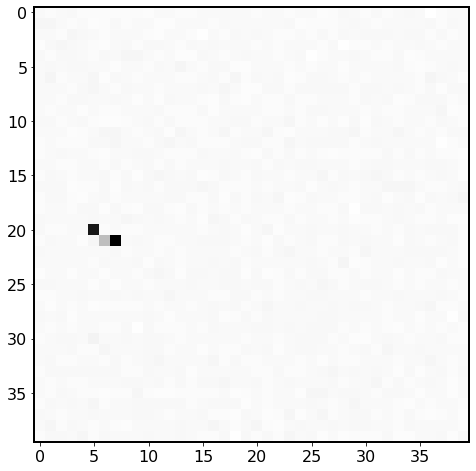

In [9]:
# Show this image:
plt.figure(figsize=(8,8))
plt.imshow(hdul[1].data, cmap='gray_r')

### Modify a fits file

We can change header keywords and/or the data if we wish, and then write a new file. Here are examples of how to change and add keywords, and change the data:

In [10]:
hdul[1].header['EXTNAME']

'SCI'

In [11]:
hdul[1].header['EXTNAME']  = 'PC'

In [12]:
hdul[1].header['EXTNAME']

'PC'

In [13]:
hdul.info()

Filename: /Users/martini.10/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  PC            1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


In [14]:
hdul[1].header['comment'] = 'A comment'
hdul[1].header['history'] =  'Last updated 10 October 2021'
hdul[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   40 / length of data axis 1                          
NAXIS2  =                   40 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'PC      '           / extension name                                 
EXTVER  =                    1 / extension version number                       
INHERIT =                    T / inherit the primary header                     
ROOTNAME= 'U2EQ0201T'          / rootname of the observation set                
EXPNAME = 'U2EQ0201T'          / 9 character exposure identifier                
CRVAL1  =        215.5971675

In [15]:
# Save these changes:
hdul.writeto('newfile.fits', overwrite=True)

### Table Data

In [16]:
fits_table_filename = fits.util.get_testdata_filepath('tb.fits')
hdul = fits.open(fits_table_filename)
hdul.info()
data = hdul[1].data #  the first extension is a table / BinTableHDU
print(data)

Filename: /Users/martini.10/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/tb.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1                1 BinTableHDU     24   2R x 4C   [1J, 3A, 1E, 1L]   
[(1, 'abc', 3.70000007,  0) (2, 'xy', 6.69999971,  1)]


In [17]:
# The table array is basically a numpy record array: 
print(data.dtype)
# Note this provides a name and the format for each column

# Here is the first row:
print("Row 0: ", data[0])

# Here is the third column: 
print("Columnn 'c3':", data['c3'])

# Here is a list of columns and their properties: 
print("Column information: ", hdul[1].columns)

# Here is a list of just their names:
print("Column names only:", hdul[1].columns.names)

(numpy.record, [('c1', '>i4'), ('c2', 'S3'), ('c3', '>f4'), ('c4', 'i1')])
Row 0:  (1, 'abc', 3.7000000715255736, False)
Columnn 'c3': [3.70000007 6.69999971]
Column information:  ColDefs(
    name = 'c1'; format = '1J'; null = -2147483647; disp = 'I11'
    name = 'c2'; format = '3A'; disp = 'A3'
    name = 'c3'; format = '1E'; bscale = 3; bzero = 0.4; disp = 'G15.7'
    name = 'c4'; format = '1L'; disp = 'L6'
)
Column names only: ['c1', 'c2', 'c3', 'c4']


### Create a new column 

In [18]:
names = np.array(['Galaxy1', 'Galaxy2'])
col5 = fits.Column(name = 'Name', array=names, format='20A')

In [19]:
# original columns 
col1 = hdul[1].columns['c1']
col2 = hdul[1].columns['c2']
col3 = hdul[1].columns['c3']
col4 = hdul[1].columns['c4']

# New column list:
cols = fits.ColDefs([col1, col2, col3, col4, col5])

In [20]:
cols

ColDefs(
    name = 'c1'; format = '1J'; null = -2147483647; disp = 'I11'
    name = 'c2'; format = '3A'; disp = 'A3'
    name = 'c3'; format = '1E'; bscale = 3; bzero = 0.4; disp = 'G15.7'
    name = 'c4'; format = '1L'; disp = 'L6'
    name = 'Name'; format = '20A'
)

In [21]:
# Define the new table
hdul[1] = fits.BinTableHDU.from_columns(cols)
# Also change the extension anme
hdul[1].header['EXTNAME'] = 'Table'

In [22]:
# Look at the extension name change
hdul.info()

Filename: /Users/martini.10/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/tb.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  Table         1 BinTableHDU     26   2R x 5C   ['1J', '3A', '1E', '1L', '20A']   


In [23]:
# We can use the column name to access the data
hdul[1].data['Name']

chararray(['Galaxy1', 'Galaxy2'], dtype='<U20')

In [24]:
# Write out this file:
hdul.writeto("testtable.fits", overwrite=True)

### SDSS QSO Catalog

In [26]:
# Download an early SDSS QSO catalog, simply because the file size is small
import urllib
qsocaturl = 'http://classic.sdss.org/dr4/products/value_added/dr1qso.fits'
qsofile = 'dr1qso.fits'
if not os.path.isfile(qsofile): 
    urllib.request.urlretrieve(qsocaturl, qsofile)

In [27]:
qhdu = fits.open(qsofile)
qhdu.info()

Filename: dr1qso.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    171   16713R x 52C   [18A, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, J, J, I, I, 25A]   


In [28]:
qhdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  213 / width of table in bytes                        
NAXIS2  =                16713 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   52 / number of fields in each row                   
TTYPE1  = 'SDSSName'           / label for field   1                            
TFORM1  = '18A     '           / data format of field: ASCII Character          
TTYPE2  = 'RA      '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT2  = 'degrees '        

Text(0, 0.5, 'Number')

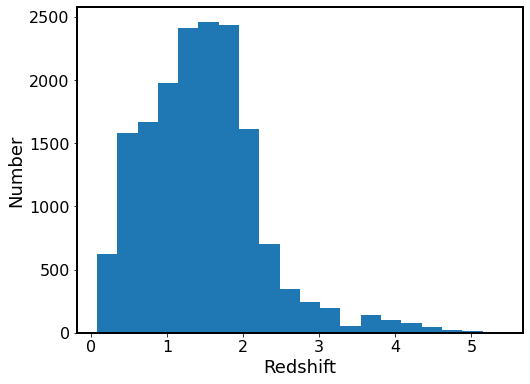

In [29]:
plt.figure(figsize=(8, 6))
num, vals, _ = plt.hist(qhdu[1].data['Z'], bins=20)
plt.xlabel("Redshift")
plt.ylabel("Number")

Text(0, 0.5, 'r - i')

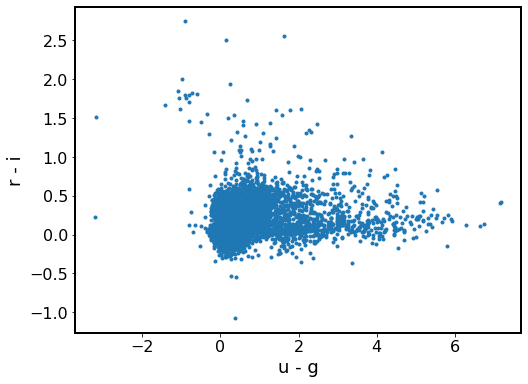

In [30]:
plt.figure(figsize=(8, 6))
pmask = qhdu[1].data['psfmagerr_u'] < 0.3
pmask = pmask*(qhdu[1].data['psfmagerr_g'] < 0.3)
plt.plot( qhdu[1].data['psfmag_u'] - qhdu[1].data['psfmag_g'], 
         qhdu[1].data['psfmag_r'] - qhdu[1].data['psfmag_i'], '.')
plt.xlabel('u - g')
plt.ylabel('r - i')